In [1]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
from IPython.display import Image

![](images/pokemonBg.png)

# Данные

In [4]:
df = pd.read_csv(
    # путь к вашему файлу pokemon_full
    'data/Pokemon/pokemon_full.csv'
)
df.drop('Number', axis=1, inplace=True)

In [5]:
print(df.shape)

df.head()

(721, 22)


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Первый взгляд</h3> 
    </div>
</div>

Построй 4 гистограммы (__histogram__) на 30 бинов главнхых 4 характеристик покемонов: 

* `HP` - здоровья
* `Attack` - уровня атаки
* `Defense` - уровня защиты
* `Speed` - скорости

Конечно, построить их надо на одном графике с 4 подграфиками (__axes__). Не забудь выделить достаточно места (параметр __figsize__).

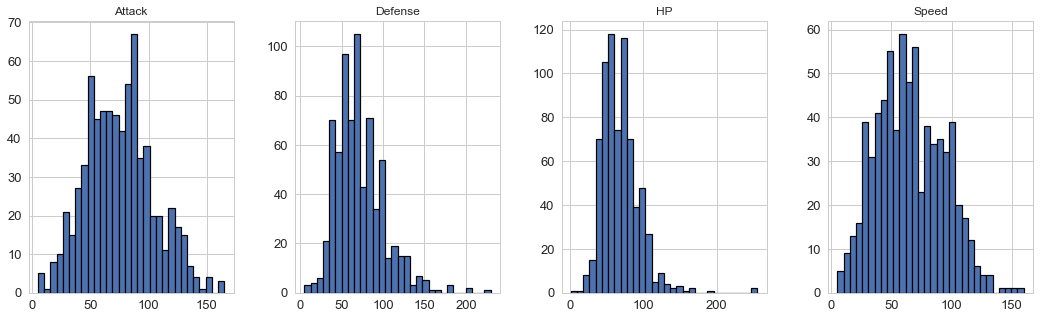

In [6]:
df[['HP', 'Attack', 'Defense', 'Speed']].hist(bins=30, edgecolor='black', linewidth=1.2, layout=(1, 4), figsize=(18, 5));

Что видно? Есть странные большие значения?

Кажется, в __HP__ точно есть одно. Давай построим __boxplot__ и проверим, что оно там наверняка есть.

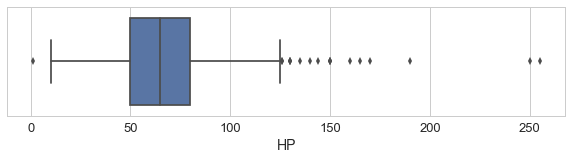

In [7]:
f, ax = plt.subplots(1,1, figsize=(10, 2))
sns.boxplot(df.HP, ax=ax);

<div class="panel panel-warning">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус</h3> 
    </div>
</div>

Прежде всего найди этих странных покемонов! У кого это больше __220__ жизней? А кто этот задохлик, у кого меньше __5__ здоровья? Выведи их имена!

И покажи им, кто здесь главный, урезав им уровень здоровья с помощью __99% винсоризации__!

Не забудь построить снова __boxplot__ и убедиться, что картинка другая. Правда?

In [8]:
df[(df.HP > 220) | (df.HP < 5)][['Name', 'HP']]

,Name,HP
112,Chansey,250
241,Blissey,255
291,Shedinja,1


In [9]:
import scipy.stats

In [10]:
df.HP = scipy.stats.mstats.winsorize(df.HP, limits=0.01)

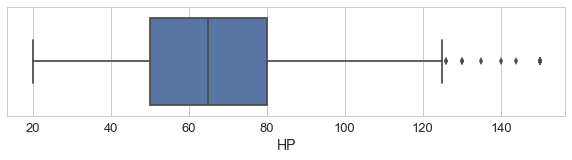

In [11]:
f, ax = plt.subplots(1,1, figsize=(10, 2))
sns.boxplot(df.HP, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Красный значит сильный?</h3> 
    </div>
</div>

У детей 4 лет и немного старше повелось, что красная машинка быстрее ездит, потому что она красная. Красный самолетик быстрее летит. Но бьются ли красные покемоны сильнее всех? 

* Сгруппируй всех покемонов по цвету (`Color`), усредни их атаку (`Attack`) в каждой группе.
* Построй __bar plot__, не забыв:
    * Раскрасить столбцы (каждый в свой цвет) с помощью словаря `colors`.
    * Обвести столбцы черной линией толщиной 1, чтобы белый столбец не потерялся.

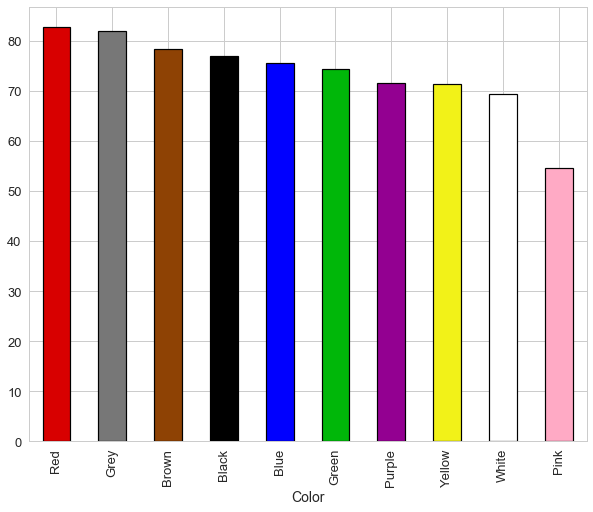

In [12]:
colors = { 
    'Red':    '#d80000',
    'Grey':   '#777777',
    'Brown':  '#8e4204',
    'Black':  '#000000',
    'Blue':   '#0000ff',
    'Green':  '#00b709',
    'Purple': '#930091',
    'Yellow': '#f2f218',
    'White':  '#ffffff',
    'Pink':   '#ffaac5'
}
strengths = df.groupby('Color').agg('mean').Attack.sort_values(ascending=False)
strengths.plot.bar(colors=[colors[x] for x in strengths.index], edgecolor='black', linewidth=1.2);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Тот самый график</h3> 
    </div>
</div>

Саше нужно построить __stacked normalized bar chart__, на котором будет отлично видно, _какова доля легендарных покемонов в каждом поколении_. 

Помогите Саше  : )

_Лайфхак:_ если включить мозги, то с помощью __pivot table__ можно облегчить себе работу.

Вот, кстати, как понять __pivot_table__:

In [16]:
df.groupby('Generation').agg('count')[['isLegendary']]

,isLegendary
Generation,
1,151
2,100
3,135
4,107
5,156
6,72


In [17]:
df_ = df.pivot_table(
    index='Generation',
    columns='isLegendary',
    aggfunc='size')

In [18]:
df_

isLegendary,False,True
Generation,,
1,147,4
2,95,5
3,125,10
4,96,11
5,146,10
6,66,6


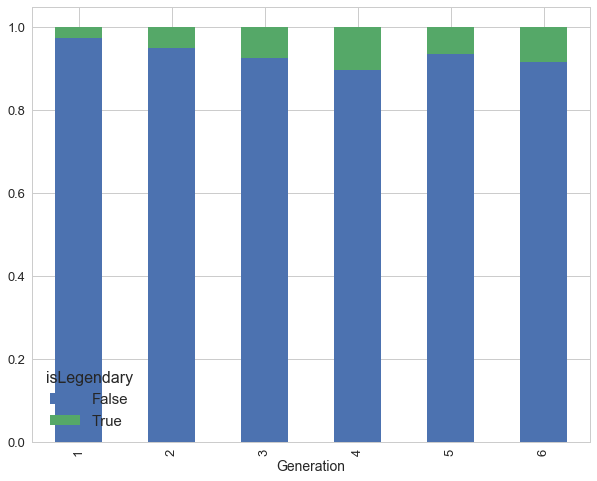

In [19]:
df_ = df_.div(df_.sum(axis=1), axis=0)

df_.plot.bar(stacked=True);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: I8∑π and it was delicious!</h3> 
    </div>
</div>

Сейчас простое задание. Честно. 

Построй __pie chart__ разных типов покемонов. С тенью!

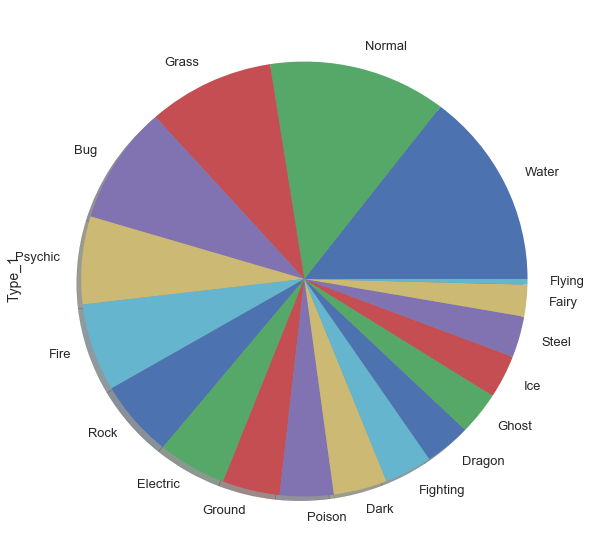

In [21]:
_, ax = plt.subplots(1,1, figsize=(10,10))
df.Type_1.value_counts().plot.pie(shadow=1, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 5: Больше усов</h3> 
    </div>
</div>

Постройте разные __box plot__ силы (__Total__) каждого из типа покемонов (__Type_1__), но отсортируйте их расположение на графике по их __медианам__, от самых слабых к самым сильным.

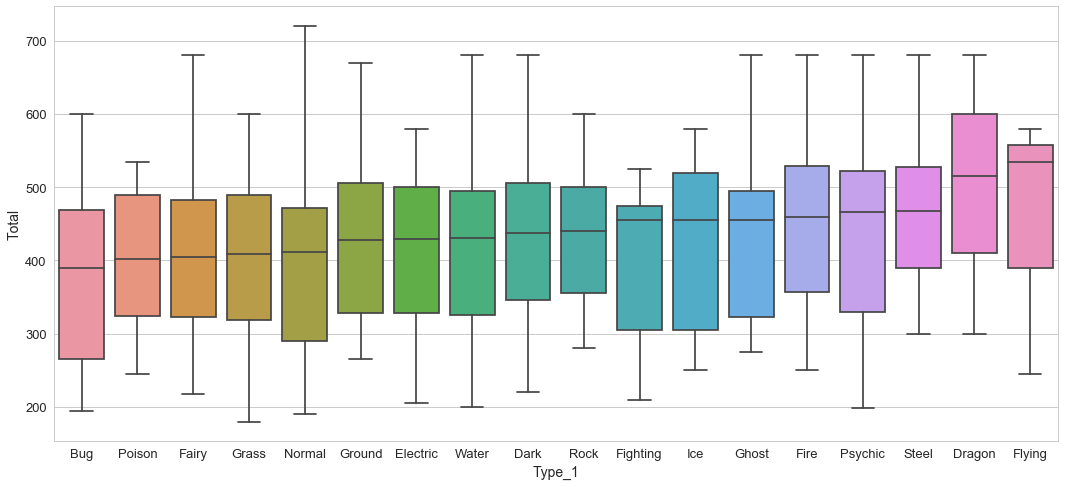

In [22]:
f, ax = plt.subplots(1,1, figsize=(18, 8))
order = df.groupby('Type_1').agg('median').Total.sort_values().index
sns.boxplot(x='Type_1', y='Total', data=df, order=order, ax=ax);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 6: Так и сяк</h3> 
    </div>
</div>

1. Построй __jointplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть коэффициент корреляции Пирсона и гистограммы величин.
2. Построй __lmplot__ между __Catch Rate__ и __Total__. Обрати внимание, что на нем есть линия, выделяющая зависимость, но нет коэффициента корреляции или гистограмм.
3. Попробуй построить оба графика на __subplots__ matplotlib'а. Убедись, что у тебя не получилось, так как гистограммы на __jointplot__'е тоже упакованы в разные оси.

Разочаруйся.

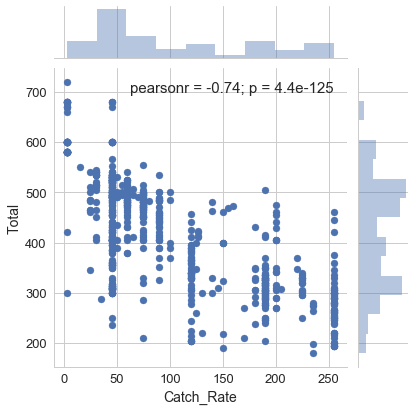

In [23]:
sns.jointplot(x='Catch_Rate', y='Total', data=df);

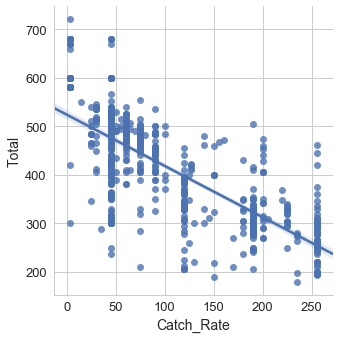

In [24]:
sns.lmplot(x='Catch_Rate', y='Total', data=df);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 7: На голову выше</h3> 
    </div>
</div>

Время проверить, что даже тщедушные легендарные покемоны сильнее даже очень крутых, но простецких, не_легендарных. 

Я буду описывать тебе, как заказчик, что хочу, а ты так и нарисуешь, окда?

* На графике должно быть 4 __violin plot__: для `HP`, `Attack`, `Defense` и `Speed`.
* На каждый из которых должен быть нанесены квартили.
* Каждый из которых должен быть разделенный (__`split=True`__), как [здесь](http://seaborn.pydata.org/examples/grouped_violinplots.html). Но если в примере разделение по полу, то здесь как раз по __isLegendary__.

_Лайфхак:_ если включить мозги, то с помощью __melt__ можно облегчить себе работу.

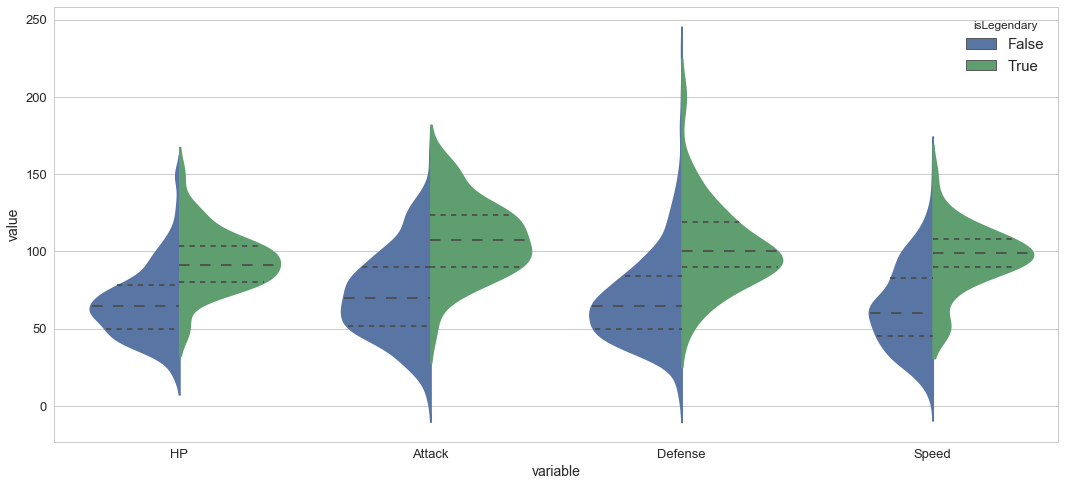

In [25]:
stats = ['HP', 'Attack', 'Defense', 'Speed']
melted = pd.melt(df[stats + ['isLegendary']], value_vars=stats, id_vars='isLegendary')

f, ax = plt.subplots(1,1, figsize=(18, 8))
sns.violinplot(x='variable', y='value', hue='isLegendary', data=melted, split=True, inner="quartile");

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 0: Новое начало</h3> 
    </div>
</div>

_..ты проснулся на лекции. Рядом стоит Ольферук и говорит: "Хорош, ты первый, кто у меня вырубился на занятиях!"_

_Ты хлопаешь глазами. "А эт самое," - бормочешь, - "а покемоны?"_

_"Че?" - Ольферук, кажется, в замешательстве. "Ты, блин, как в том анекдоте"_

Домашка по визуализации, - помнишь?

In [26]:
df = pd.read_csv(
    # путь к твоему файлу data.csv с прошлой домашки
    'data/Scoring/data_cleaned.csv'
)

In [27]:
print(df.shape)
df.head()

(999, 13)


,Age,Sex,Married,Dependents,Income,Experience,RealEstate,MonthlyPayment,Trustworthy,PaymentFraction,FamilyMembers,RelativeIncome,AgeGroup
0,28.0,0.0,1.0,0.0,9000.0,9.0,0.0,3946.0,0.0,0.438444,1.0,5054.000000,В самом соку
1,39.0,1.0,1.0,1.0,13500.0,17.0,0.0,2460.0,1.0,0.182222,2.0,5520.000000,Увядающий
2,31.0,1.0,0.0,2.0,7000.0,11.0,0.0,3126.0,0.0,0.446571,2.0,1937.000000,Увядающий
3,34.0,1.0,0.0,1.0,10200.0,15.0,41.0,3280.0,1.0,0.321569,1.0,6920.000000,Увядающий
4,46.0,0.0,1.0,2.0,8500.0,20.0,0.0,3348.0,1.0,0.393882,3.0,1717.333333,Увядающий


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Разрез общества</h3> 
    </div>
</div>

Создай __FacetGrid__ из возрастных групп по столбцам и полу по строкам. В каждом подграфике нарисуй __гистограмму__ ежемесячного платежа.

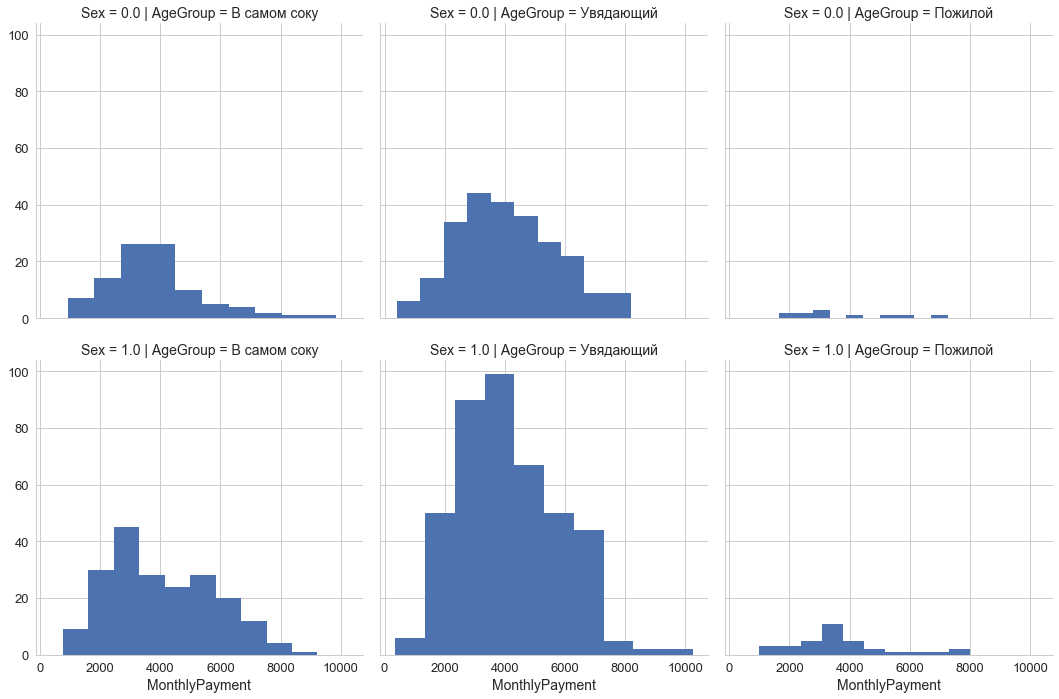

In [28]:
g = sns.FacetGrid(data=df, row='Sex', col='AgeGroup', size=5)
g.map(plt.hist, "MonthlyPayment", lw=0);

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Полезный признак</h3> 
    </div>
</div>

Нарисуй диаграмму рассеяния (__scatter plot__), где по оси абсцисс отложи _доход_, а по оси ординат - _величина месячного платежа_.

Не забудь раскрасить в разные цвета в зависимости от того, благонадежен ли клиент! 

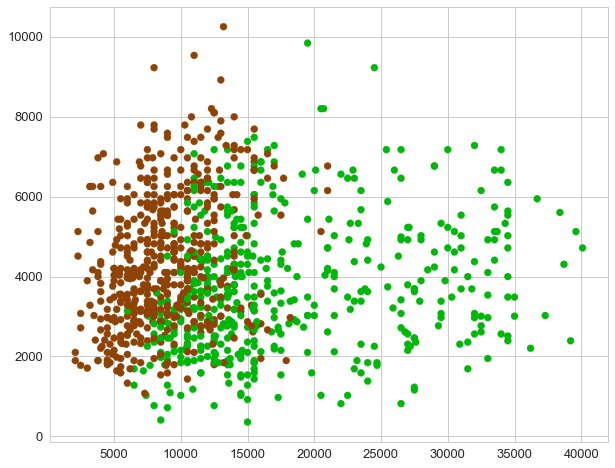

In [29]:
plt.scatter(df.Income, df.MonthlyPayment, c=df.Trustworthy.map({ 0: '#8e4204', 1: '#00b709' }));

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Ненужный нужный график</h3> 
    </div>
</div>

Построй диаграмму рассеяния доли ежемесячого платежа по оси X и благонадежности по Y. Как видишь, множество точек слиплись, и не ясно, где мы можем провести разделяющую границу по признаку доли ежемемячного платежа.

Поэтому ниже построй тот самый __stripplot__ с параметром __`jitter=True`__, чтобы посмотреть на тот же по сути график, но оценивая объем данных в каждой из групп. Кроме того, сделай пожалуйста, линию той самой разделяющей границы по признаку доли платежа, - пока что на глаз! А уже через неделю будем делать первые предсказания реальными алгоритмами.

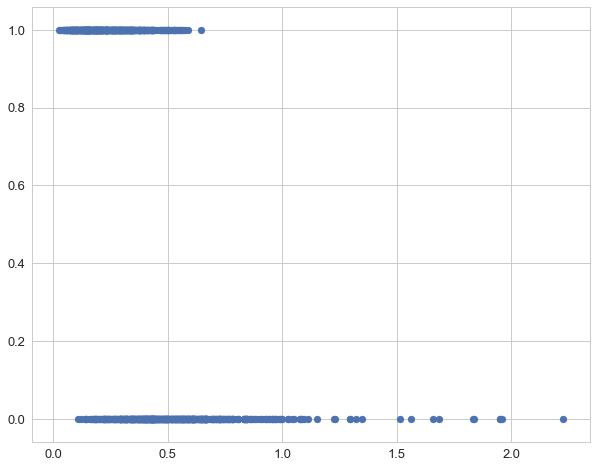

In [30]:
plt.scatter(df.PaymentFraction, df.Trustworthy);

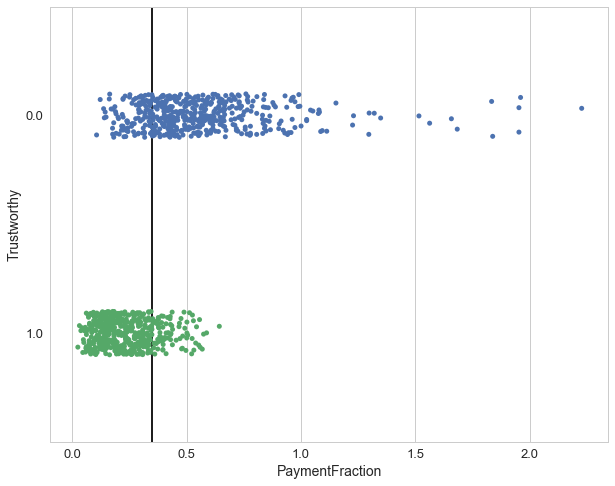

In [31]:
f,ax = plt.subplots(1,1)
sns.stripplot(y='Trustworthy', x='PaymentFraction', orient='h', data=df, jitter=True, ax=ax);
ax.axvline(x=0.35, c='black');

<div class="panel panel-success" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Финиш!</h3> 
    </div>
</div>

Если ты действительно добрался до этого места в тетрадке и честно все нарисовал, - красавчик! Обязательно расскажи мне об этом на следующем занятии.